In [6]:
import pandas as pd
import numpy as np
from plotutils import *
np.seterr(all='raise')

{'divide': 'raise', 'over': 'raise', 'under': 'raise', 'invalid': 'raise'}

# logit

In [7]:
logdir='../IPG/test/log'; date='06_20_2021'
subsolver='projectedGD'; warm_start=True
loss='logit'; lam_shrink=[0.1, 0.05]; group_size=[10, 100]; overlap_ratio=[0.1, 0.3, 0.5]; excludes= ['australian', 'news20', 'rcv1', 'real-sim']

In [8]:
inexact_type=1; param1_lst = [1e-12]; param2_lst = ['empty']
algo_df_dict_inexact_type1 = get_all(logdir, date, inexact_type, loss, subsolver, warm_start,
                             lam_shrink, group_size, overlap_ratio,
                             excludes, param1_lst, param2_lst)
ppf = PerformanceProfile(algo_df_dict_inexact_type1)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
inexact_type1_best = '1-projectedGD-True-1e-12-empty'
print('Best params:', inexact_type1_best)

1-projectedGD-True-1e-12-empty
 96/96 instances terminate with status:  0
All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
Best params: 1-projectedGD-True-1e-12-empty


In [9]:
# algo_df_dict_inexact_type1['1-projectedGD-True-1e-12-empty'][algo_df_dict_inexact_type1['1-projectedGD-True-1e-12-empty']['status'] != 0]
# algo_df_dict_inexact_type1['1-projectedGD-True-1e-12-empty']

In [10]:
inexact_type=2; param1_lst = [1e-12]; param2_lst = [0.1, 0.5, 0.9]
algo_df_dict_inexact_type2 = get_all(logdir, date, inexact_type, loss, subsolver, warm_start,
                             lam_shrink, group_size, overlap_ratio,
                             excludes, param1_lst, param2_lst)
ppf = PerformanceProfile(algo_df_dict_inexact_type2)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
inexact_type2_best = get_best(pools)
# inexact_type2_best = '2-projectedGD-True-1e-12-0.5'
print('Best params:', inexact_type2_best)

2-projectedGD-True-1e-12-0.1
 96/96 instances terminate with status:  0
2-projectedGD-True-1e-12-0.5
 96/96 instances terminate with status:  0
2-projectedGD-True-1e-12-0.9
 96/96 instances terminate with status:  0
All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
Best params: 2-projectedGD-True-1e-12-0.1


In [11]:
# for key in algo_df_dict_inexact_type2:
#     print(key)
#     print(algo_df_dict_inexact_type2[key][algo_df_dict_inexact_type2[key]['status'] != 0][['datasetid', 'status', 'time' ]])
#     print("==")

In [12]:
inexact_type=3; param1_lst = [3.0]; param2_lst = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]
algo_df_dict_inexact_type3 = get_all(logdir, date, inexact_type, loss, subsolver, warm_start,
                             lam_shrink, group_size, overlap_ratio,
                             excludes, param1_lst, param2_lst)
ppf = PerformanceProfile(algo_df_dict_inexact_type3)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
# print("=================")
inexact_type3_best = get_best(pools)
# inexact_type3_best = '3-projectedGD-True-3.0-1.0'
print('Best params:', inexact_type3_best)

3-projectedGD-True-3.0-1.0
 96/96 instances terminate with status:  0
3-projectedGD-True-3.0-10.0
 96/96 instances terminate with status:  0
3-projectedGD-True-3.0-100.0
 96/96 instances terminate with status:  0
3-projectedGD-True-3.0-1000.0
 96/96 instances terminate with status:  0
3-projectedGD-True-3.0-10000.0
 96/96 instances terminate with status:  0
3-projectedGD-True-3.0-100000.0
 96/96 instances terminate with status:  0
3-projectedGD-True-3.0-1000000.0
 96/96 instances terminate with status:  0
All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
Best params: 3-projectedGD-True-3.0-1000.0


In [13]:
# for key in algo_df_dict_inexact_type3:
#     print(key)
#     print(algo_df_dict_inexact_type3[key][algo_df_dict_inexact_type3[key]['status'] != 0][['datasetid', 'status', 'time' ]])
#     print("==")

All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
1-projectedGD-True-1e-12-empty Win:16 | Lose:80
1-projectedGD-True-1e-12-empty Win:45 | Lose:51
2-projectedGD-True-1e-12-0.1 Win:72 | Lose:24


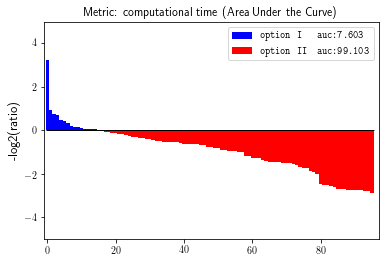

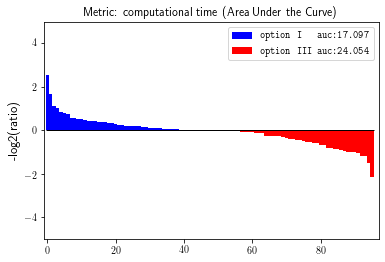

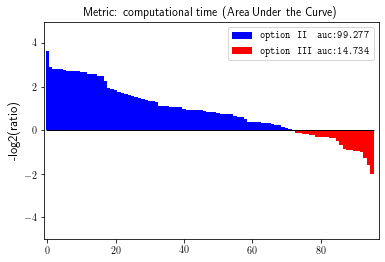

In [14]:
final = {}
final[inexact_type1_best] = algo_df_dict_inexact_type1[inexact_type1_best]
final[inexact_type2_best] = algo_df_dict_inexact_type2[inexact_type2_best]
final[inexact_type3_best] = algo_df_dict_inexact_type3[inexact_type3_best]
ppf = PerformanceProfile(final)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
# _ = ppf.plot(column='subits',show_num=True, options={'ratio_max':5})
_ = ppf.plot(column='time',show_num=False, options={'ratio_max':5}, save=True, saveDir='./natOG/', labels=['option I\ \ \ ', 'option II\ \ ', 'option III'])

In [8]:
cols = ['datasetid', 'F', 'time', 'nz']
df1 = algo_df_dict_inexact_type1[inexact_type1_best][cols].copy()
df2 = algo_df_dict_inexact_type2[inexact_type2_best][cols].copy()
df3 = algo_df_dict_inexact_type3[inexact_type3_best][cols].copy()
df13_merged = pd.merge(df1, df3, on='datasetid', suffixes=("_type1", "_type3"), how='left')

better13_z = np.sum((df13_merged['nz_type1'] - df13_merged['nz_type3']) > 0 ) 
same13_z = np.sum((df13_merged['nz_type1'] - df13_merged['nz_type3']) == 0 ) 
worse13_z = np.sum((df13_merged['nz_type1'] - df13_merged['nz_type3']) <0 ) 

better13_F = np.sum((df13_merged['F_type1'] - df13_merged['F_type3']) < -1e-8 ) 
same13_F = np.sum(np.abs(df13_merged['F_type1'] - df13_merged['F_type3']) <= 1e-8 ) 
worse13_F = np.sum((df13_merged['F_type1'] - df13_merged['F_type3']) > 1e-8 ) 

df23_merged = pd.merge(df2, df3, on='datasetid', suffixes=("_type2", "_type3"), how='left')
better23_z = np.sum((df23_merged['nz_type2'] - df23_merged['nz_type3']) > 0 ) 
same23_z = np.sum((df23_merged['nz_type2'] - df23_merged['nz_type3']) == 0 ) 
worse23_z = np.sum((df23_merged['nz_type2'] - df23_merged['nz_type3']) <0 ) 

better23_F = np.sum((df23_merged['F_type2'] - df23_merged['F_type3']) < -1e-8 ) 
same23_F = np.sum(np.abs(df23_merged['F_type2'] - df23_merged['F_type3']) <=1e-8 ) 
worse23_F = np.sum((df23_merged['F_type2'] - df23_merged['F_type3']) > 1e-8 ) 

print("For 1-3 comparsion:\n==========================")
print(" In terms final F:")
print(f"  better:{better13_F} | same:{same13_F} | worse: {worse13_F}")
print(" In terms #z:")
print(f"  better:{better13_z} | same:{same13_z} | worse: {worse13_z}")
print("For 2-3 comparsion:\n==========================")
print(" In terms final F:")
print(f"  better:{better23_F} | same:{same23_F} | worse: {worse23_F}")
print(" In terms #z:")
print(f"  better:{better23_z} | same:{same23_z} | worse: {worse23_z}")

For 1-3 comparsion:
 In terms final F:
  better:41 | same:31 | worse: 24
 In terms #z:
  better:23 | same:53 | worse: 20
For 2-3 comparsion:
 In terms final F:
  better:74 | same:8 | worse: 14
 In terms #z:
  better:25 | same:51 | worse: 20


All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
1-projectedGD-True-1e-12-empty Win:43 | Lose:53
All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
1-projectedGD-True-1e-12-empty Win:42 | Lose:54
All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
1-projectedGD-True-1e-12-empty Win:48 | Lose:48
All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
1-projectedGD-True-1e-12-empty Win:45 | Lose:51
All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
1-projectedGD-True-1e-12-empty Win:48 | Los

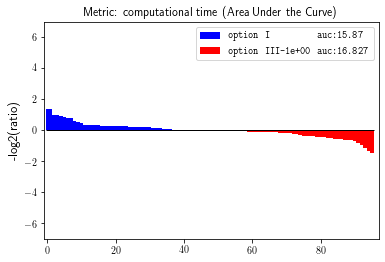

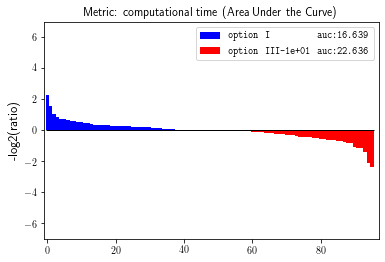

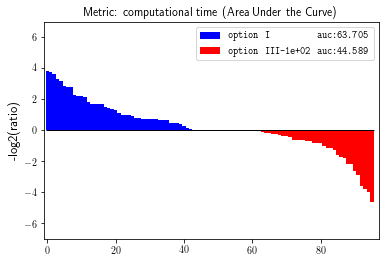

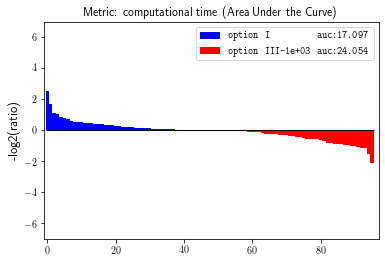

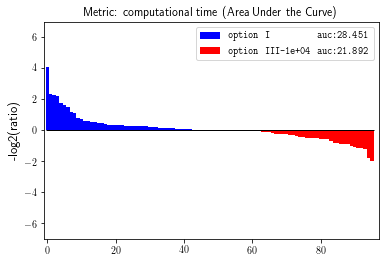

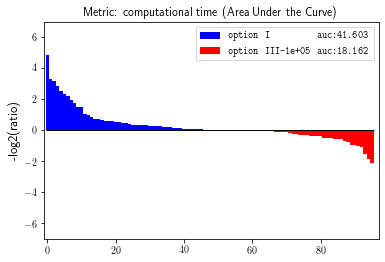

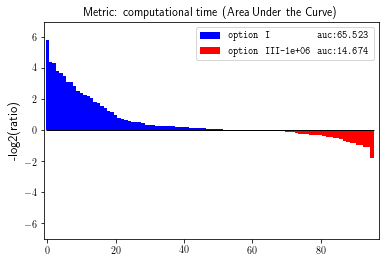

In [15]:
for c in [1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]:
    final = {}
    final[inexact_type1_best] = algo_df_dict_inexact_type1[inexact_type1_best]
    type3_sensitivity = f'3-projectedGD-True-3.0-{c}'
    final[type3_sensitivity] = algo_df_dict_inexact_type3[type3_sensitivity]
    ppf = PerformanceProfile(final)
    ppf.get_subset_by_time(threshold=1, remove_failed=True)
    _ = ppf.plot(column='time',show_num=False, options={'ratio_max':7}, save=True, saveDir='./natOG/sensitivity', labels=['option I\ \ \ \ \ \ \ \ \ ', f'option III-{c:1.0e}'])

All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
2-projectedGD-True-1e-12-0.1 Win:79 | Lose:17
All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
2-projectedGD-True-1e-12-0.1 Win:75 | Lose:21
All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
2-projectedGD-True-1e-12-0.1 Win:74 | Lose:22
All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
2-projectedGD-True-1e-12-0.1 Win:72 | Lose:24
All algorithms failed in 0 instances (failure code -2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 96 instances are kept.
2-projectedGD-True-1e-12-0.1 Win:77 | Lose:19
All a

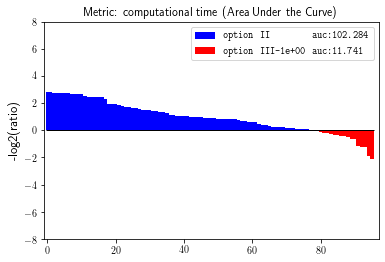

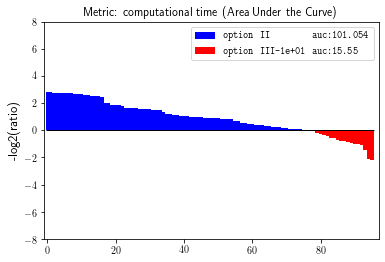

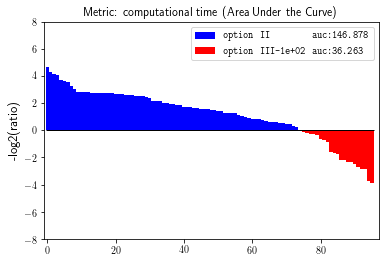

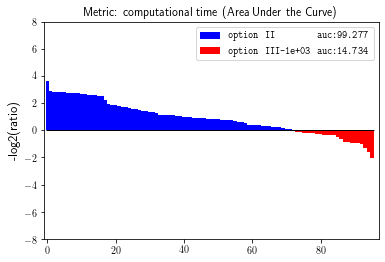

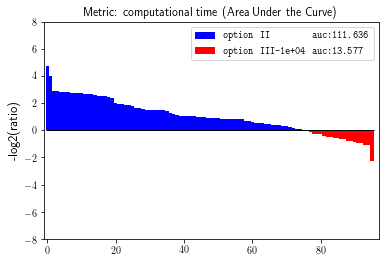

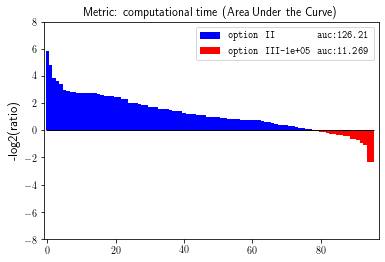

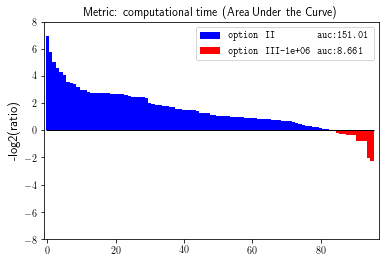

In [16]:
for c in [1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]:
    final = {}
    final[inexact_type2_best] = algo_df_dict_inexact_type2[inexact_type2_best]
    type3_sensitivity = f'3-projectedGD-True-3.0-{c}'
    final[type3_sensitivity] = algo_df_dict_inexact_type3[type3_sensitivity]
    ppf = PerformanceProfile(final)
    ppf.get_subset_by_time(threshold=1, remove_failed=True)
    _ = ppf.plot(column='time',show_num=False, options={'ratio_max':8}, save=True, saveDir='./natOG/sensitivity', labels=['option II\ \ \ \ \ \ \ \ ', f'option III-{c:1.0e}'])

In [ ]:
cp -R natOG/ ~/Dropbox\ \(LU\ Student\)/Apps/Overleaf/inexact\ Proximal\ gradient\ doc/paper_adaptiveIPG/images/natOG

# main figures

In [1]:
import pandas as pd
import numpy as np
from plotutils import *
import shutil
import os
np.seterr(all='raise')
logdir='../IPG/test/log';subsolver='projectedGD'; warm_start=True
loss='logit'; lam_shrink=[0.1, 0.05]; group_size=[10, 100]; overlap_ratio=[0.1, 0.3, 0.5]; excludes= ['australian', 'news20', 'rcv1', 'real-sim']

In [2]:
inexact_type1_best = '1-projectedGD-True-1e-12-empty'
inexact_type=1; param1_lst = [1e-12]; param2_lst = ['empty']
# part 1
date='06_20_2021'
algo_df_dict_inexact_type1_part1 = get_all(logdir, date, inexact_type, loss, subsolver, warm_start,
                             lam_shrink, group_size, overlap_ratio,
                             excludes, param1_lst, param2_lst)
df1_part1 = algo_df_dict_inexact_type1_part1[inexact_type1_best]
date='06_23_2021'
algo_df_dict_inexact_type1_part2 = get_all(logdir, date, inexact_type, loss, subsolver, warm_start,
                             lam_shrink, group_size, overlap_ratio,
                             None, param1_lst, param2_lst)
df1_part2 = algo_df_dict_inexact_type1_part2[inexact_type1_best]
df1 = pd.concat([df1_part1, df1_part2])
# print(f"Exceed 12hours with: {132-df1.shape[0]} instances")

1-projectedGD-True-1e-12-empty
 96/96 instances terminate with status:  0
1-projectedGD-True-1e-12-empty
 16/36 instances terminate with status:  2
 20/36 instances terminate with status:  0


In [3]:
inexact_type=2; param1_lst = [1e-12]; param2_lst = [0.1]
inexact_type2_best = '2-projectedGD-True-1e-12-0.1'
# part 1
date='06_20_2021'
algo_df_dict_inexact_type2_part1 = get_all(logdir, date, inexact_type, loss, subsolver, warm_start,
                             lam_shrink, group_size, overlap_ratio,
                             excludes, param1_lst, param2_lst)
df2_part1 = algo_df_dict_inexact_type2_part1 [inexact_type2_best]
date='06_23_2021'
algo_df_dict_inexact_type2_part2 = get_all(logdir, date, inexact_type, loss, subsolver, warm_start,
                             lam_shrink, group_size, overlap_ratio,
                             None, param1_lst, param2_lst)
df2_part2 = algo_df_dict_inexact_type2_part2[inexact_type2_best]
df2 = pd.concat([df2_part1, df2_part2])
# print(f"Exceed 12hours with: {132-df2.shape[0]} instances")

2-projectedGD-True-1e-12-0.1
 96/96 instances terminate with status:  0
2-projectedGD-True-1e-12-0.1
  9/36 instances terminate with status:  2
 27/36 instances terminate with status:  0


In [4]:
inexact_type=3; param1_lst = [3.0]; param2_lst = [1e2]
inexact_type3_best = '3-projectedGD-True-3.0-100.0'
# part 1
date='06_20_2021'
algo_df_dict_inexact_type3_part1 = get_all(logdir, date, inexact_type, loss, subsolver, warm_start,
                             lam_shrink, group_size, overlap_ratio,
                             excludes, param1_lst, [1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6])
df3_part1 = algo_df_dict_inexact_type3_part1[inexact_type3_best]
date='06_23_2021'
algo_df_dict_inexact_type3_part2 = get_all(logdir, date, inexact_type, loss, subsolver, warm_start,
                             lam_shrink, group_size, overlap_ratio,
                             None, param1_lst, param2_lst)
df3_part2 = algo_df_dict_inexact_type3_part2[inexact_type3_best]
df3 = pd.concat([df3_part1, df3_part2])
# print(f"Exceed 12hours with: {132-df3.shape[0]} instances")

3-projectedGD-True-3.0-1.0
 96/96 instances terminate with status:  0
3-projectedGD-True-3.0-10.0
 96/96 instances terminate with status:  0
3-projectedGD-True-3.0-100.0
 96/96 instances terminate with status:  0
3-projectedGD-True-3.0-1000.0
 96/96 instances terminate with status:  0
3-projectedGD-True-3.0-10000.0
 96/96 instances terminate with status:  0
3-projectedGD-True-3.0-100000.0
 96/96 instances terminate with status:  0
3-projectedGD-True-3.0-1000000.0
 96/96 instances terminate with status:  0
3-projectedGD-True-3.0-100.0
 15/36 instances terminate with status:  2
 21/36 instances terminate with status:  0


In [ ]:
# old_names = _get_all(logdir, date, inexact_type, loss+'_ckpt', subsolver, warm_start,
#                              lam_shrink, group_size, overlap_ratio,
#                              None, param1_lst, param2_lst)
# for old_name in old_names:
#     new_name = old_name+'_3.0_1000.0'
#     for file in os.listdir(old_name):
#         file_dir = os.path.join(old_name, file)
#         info = np.load(file_dir, allow_pickle=True).item()
#         info['status'] = 0
#         np.save(file_dir, info)
#         if not os.path.exists(new_name):
#             os.makedirs(new_name)
#         shutil.move(file_dir, new_name)
#     os.rmdir(old_name)

All algorithms failed in 9 instances (failure code 2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 123 instances are kept.
1-projectedGD-True-1e-12-empty Win:16 | Lose:107
1-projectedGD-True-1e-12-empty Win:50 | Lose:67
2-projectedGD-True-1e-12-0.1 Win:101 | Lose:22


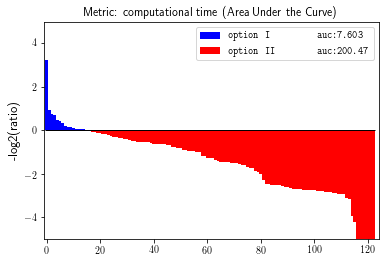

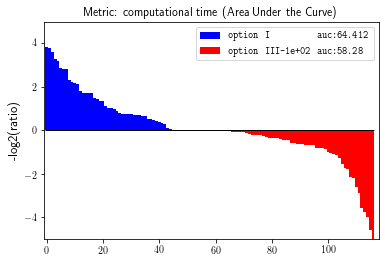

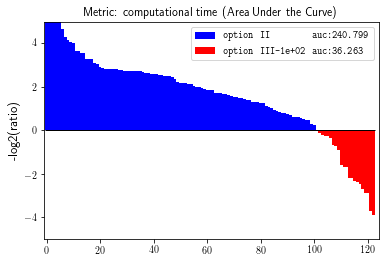

In [6]:
final = {}
final[inexact_type1_best] = df1
final[inexact_type2_best] = df2
final[inexact_type3_best] = df3
ppf = PerformanceProfile(final, failcode=2)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='time', show_num=False, options={'ratio_max':5}, save=True, saveDir='./natOG/', labels=['option I\ \ \ \ \ \ \ \ \ ', 'option II\ \ \ \ \ \ \ \ ', f'option III-{1e2:1.0e}'])

In [7]:
cols = ['datasetid', 'F', 'time', 'nz']
df13_merged = pd.merge(df1, df3, on='datasetid', suffixes=("_type1", "_type3"), how='left')

better13_z = np.sum((df13_merged['nz_type1'] - df13_merged['nz_type3']) > 0 ) 
same13_z = np.sum((df13_merged['nz_type1'] - df13_merged['nz_type3']) == 0 ) 
worse13_z = np.sum((df13_merged['nz_type1'] - df13_merged['nz_type3']) <0 ) 

better13_F = np.sum((df13_merged['F_type1'] - df13_merged['F_type3']) < -1e-8 ) 
same13_F = np.sum(np.abs(df13_merged['F_type1'] - df13_merged['F_type3']) <= 1e-8 ) 
worse13_F = np.sum((df13_merged['F_type1'] - df13_merged['F_type3']) > 1e-8 ) 

df23_merged = pd.merge(df2, df3, on='datasetid', suffixes=("_type2", "_type3"), how='left')
better23_z = np.sum((df23_merged['nz_type2'] - df23_merged['nz_type3']) > 0 ) 
same23_z = np.sum((df23_merged['nz_type2'] - df23_merged['nz_type3']) == 0 ) 
worse23_z = np.sum((df23_merged['nz_type2'] - df23_merged['nz_type3']) <0 ) 

better23_F = np.sum((df23_merged['F_type2'] - df23_merged['F_type3']) < -1e-8 ) 
same23_F = np.sum(np.abs(df23_merged['F_type2'] - df23_merged['F_type3']) <=1e-8 ) 
worse23_F = np.sum((df23_merged['F_type2'] - df23_merged['F_type3']) > 1e-8 ) 

print("For 1-3 comparsion:\n==========================")
print(" In terms final F:")
print(f"  better:{better13_F} | same:{same13_F} | worse: {worse13_F}")
print(" In terms #z:")
print(f"  better:{better13_z} | same:{same13_z} | worse: {worse13_z}")
print("For 2-3 comparsion:\n==========================")
print(" In terms final F:")
print(f"  better:{better23_F} | same:{same23_F} | worse: {worse23_F}")
print(" In terms #z:")
print(f"  better:{better23_z} | same:{same23_z} | worse: {worse23_z}")

For 1-3 comparsion:
 In terms final F:
  better:72 | same:47 | worse: 13
 In terms #z:
  better:60 | same:57 | worse: 15
For 2-3 comparsion:
 In terms final F:
  better:126 | same:6 | worse: 0
 In terms #z:
  better:71 | same:53 | worse: 8


All algorithms failed in 15 instances (failure code 2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 117 instances are kept.
1-projectedGD-True-1e-12-empty Win:45 | Lose:72
All algorithms failed in 15 instances (failure code 2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 117 instances are kept.
1-projectedGD-True-1e-12-empty Win:44 | Lose:73
All algorithms failed in 15 instances (failure code 2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 117 instances are kept.
1-projectedGD-True-1e-12-empty Win:50 | Lose:67
All algorithms failed in 15 instances (failure code 2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 117 instances are kept.
1-projectedGD-True-1e-12-empty Win:47 | Lose:70
All algorithms failed in 15 instances (failure code 2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 117 instances are kept.
1-projectedGD-True-1e-12-empty Win:50 

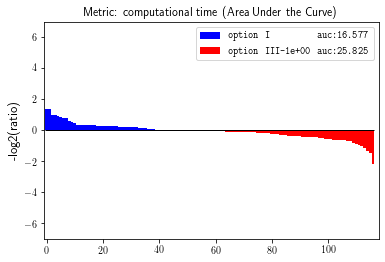

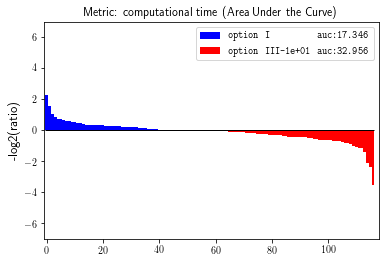

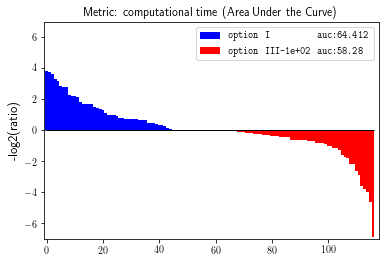

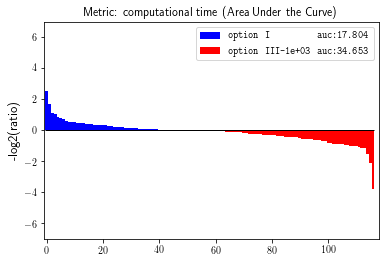

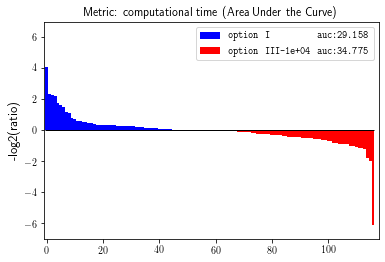

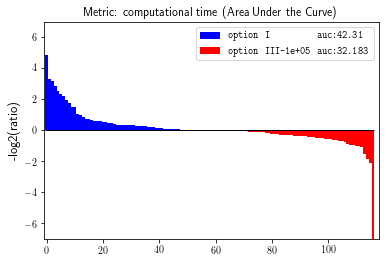

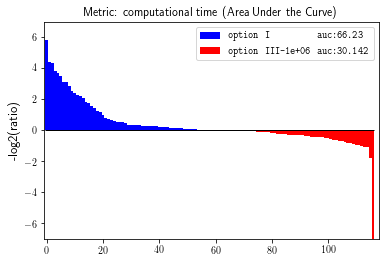

In [15]:
for c in [1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]:
    final = {}
    final[inexact_type1_best] = df1
    type3_sensitivity = f'3-projectedGD-True-3.0-{c}'
    df3_part1 = algo_df_dict_inexact_type3_part1[type3_sensitivity]
    df3_part2 = algo_df_dict_inexact_type3_part2[inexact_type3_best]
    df3 = pd.concat([df3_part1, df3_part2])
    final[type3_sensitivity] = df3
    ppf = PerformanceProfile(final, failcode=2)
    ppf.get_subset_by_time(threshold=1, remove_failed=True)
    _ = ppf.plot(column='time',show_num=False, options={'ratio_max':7}, save=True, saveDir='./natOG/sensitivity', labels=['option I\ \ \ \ \ \ \ \ \ ', f'option III-{c:1.0e}'])

All algorithms failed in 9 instances (failure code 2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 123 instances are kept.
2-projectedGD-True-1e-12-0.1 Win:106 | Lose:17
All algorithms failed in 9 instances (failure code 2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 123 instances are kept.
2-projectedGD-True-1e-12-0.1 Win:102 | Lose:21
All algorithms failed in 9 instances (failure code 2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 123 instances are kept.
2-projectedGD-True-1e-12-0.1 Win:101 | Lose:22
All algorithms failed in 9 instances (failure code 2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 123 instances are kept.
2-projectedGD-True-1e-12-0.1 Win:99 | Lose:24
All algorithms failed in 9 instances (failure code 2)
Metrics for failed instances are overwritten with np.inf
After subsetting, 123 instances are kept.
2-projectedGD-True-1e-12-0.1 Win:104 | Lose:19
A

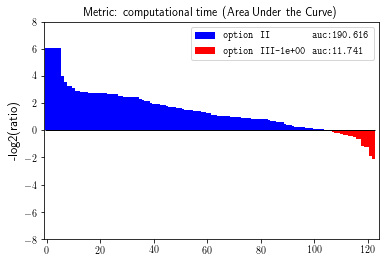

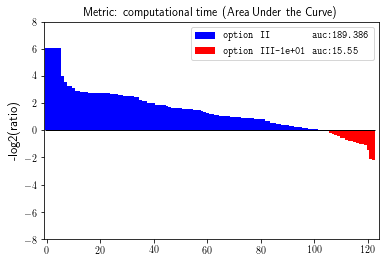

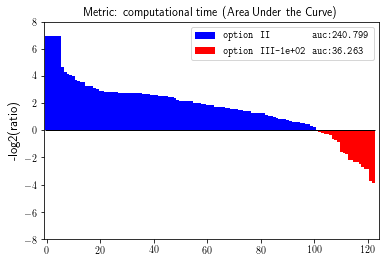

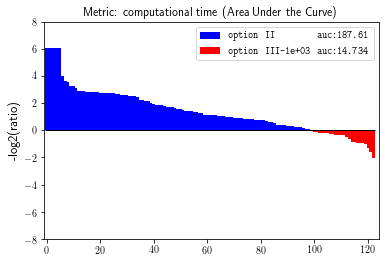

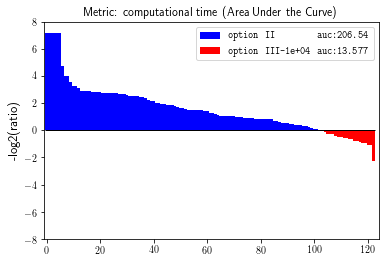

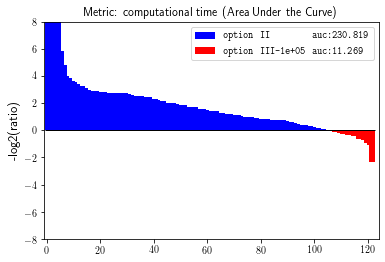

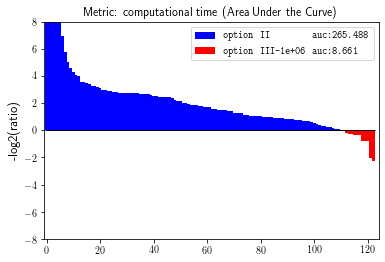

In [11]:
for c in [1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]:
    final = {}
    final[inexact_type2_best] = df2
    type3_sensitivity = f'3-projectedGD-True-3.0-{c}'
    df3_part1 = algo_df_dict_inexact_type3_part1[type3_sensitivity]
    df3_part2 = algo_df_dict_inexact_type3_part2[inexact_type3_best]
    df3 = pd.concat([df3_part1, df3_part2])
    final[type3_sensitivity] = df3
    ppf = PerformanceProfile(final, failcode=2)
    ppf.get_subset_by_time(threshold=1, remove_failed=True)
    _ = ppf.plot(column='time',show_num=False, options={'ratio_max':8}, save=True, saveDir='./natOG/sensitivity', labels=['option II\ \ \ \ \ \ \ \ ', f'option III-{c:1.0e}'])

In [20]:
# for c in [1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]:
#     final = {}
#     final[inexact_type1_best] = algo_df_dict_inexact_type1_part1[inexact_type1_best]
#     type3_sensitivity = f'3-projectedGD-True-3.0-{c}'
#     df3_part1 = algo_df_dict_inexact_type3_part1[type3_sensitivity]
#     final[type3_sensitivity] = df3_part1
#     ppf = PerformanceProfile(final, failcode=2)
#     ppf.get_subset_by_time(threshold=1, remove_failed=True)
#     _ = ppf.plot(column='time',show_num=False, options={'ratio_max':7}, save=False, saveDir='./natOG/sensitivity', labels=['option I\ \ \ \ \ \ \ \ \ ', f'option III-{c:1.0e}'])